<a href="https://colab.research.google.com/github/rahmanziaur/DTClassifierTest/blob/main/RF_on_IoT_Combined_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest(RF) on IoT Combined Dataset**

****Importing libraries****

In [ ]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always') 

**Upload File**

In [ ]:
#uploaded = files.upload()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the Dataset**

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Processed_Combined_IoT_dataset (1).csv')

**Exploratory Data Analysis**

In [ ]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [ ]:
print(dataset.shape)

(401119, 18)


In [ ]:
print(list(dataset.columns))

['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [ ]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [ ]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

**Split Dataset**

In [ ]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [ ]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

**Splitting Data**

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


**Building Decision Tree Model**

In [ ]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [ ]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

**Evaluating Model**

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[69895  3600]
 [12052 34789]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73495
           1       0.91      0.74      0.82     46841

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.87      0.87      0.87    120336



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8699308602579444
Precision: 0.9062231368360728
Recall: 0.7427040413313123
F1 Score: 0.8163557432828815
Mean Absolute Error: 0.13006913974205558
Cohens kappa: 0.7171871925765272
ROC AUC: 0.8468605586614382
Train Time(s):  44.389912773000106
Test Time(s):  2.483583191999969


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

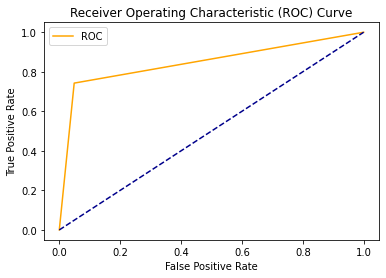

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-RF_Result.csv')

**Finding Important Features in Scikit-learn**

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

current_temperature          0.148117
temp_condition               0.145370
sphone_signal                0.137393
latitude                     0.100979
pressure                     0.091107
longitude                    0.080220
humidity                     0.053349
temperature                  0.048051
fridge_temperature           0.045483
FC4_Read_Coil                0.036231
FC2_Read_Discrete_Value      0.036142
FC3_Read_Holding_Register    0.036119
FC1_Read_Input_Register      0.035905
motion_status                0.001945
light_status                 0.001840
door_state                   0.001590
thermostat_status            0.000159
dtype: float64

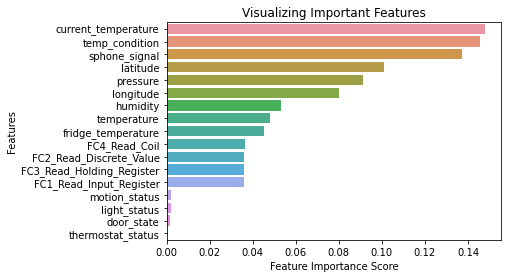

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

**Generating the Model on Selected Features**

In [ ]:
# Split dataset into features and labels
X = dataset.drop(['label','motion_status','door_state','light_status','thermostat_status','FC1_Read_Input_Register','FC3_Read_Holding_Register'], axis=1) # New Features
y=dataset['label']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [ ]:
print(X.shape)

(401119, 11)


In [ ]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [ ]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8469570915721694
Precision: 0.8755475567930999
Recall: 0.7075158466646544
F1 Score: 0.7826139743823225
Mean Absolute Error: 0.15304290842783064
Mean Absolute Error: 0.15304290842783064
Cohens kappa: 0.666564690402745
Train Time(s):  14.656240606999745
Test Time(s):  6.0471039590001965
